# Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('iris.data' , header = None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Pre-processing

In [16]:
data.columns =(['s1','sw','p1','pw','class'])  # Add column names 
data

,s1,sw,p1,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
data.shape

(150, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      150 non-null    float64
 1   sw      150 non-null    float64
 2   p1      150 non-null    float64
 3   pw      150 non-null    float64
 4   class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
data.describe()

,s1,sw,p1,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
data.min()

s1               4.3
sw               2.0
p1               1.0
pw               0.1
class    Iris-setosa
dtype: object

In [27]:
data.max()

s1                  7.9
sw                  4.4
p1                  6.9
pw                  2.5
class    Iris-virginica
dtype: object

In [30]:
data.duplicated().sum()   # Is there duplicate values or not and sum it

3

In [32]:
data.loc[data.duplicated(), :]    # It keeps 1st record of each categry

,s1,sw,p1,pw,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [33]:
data.describe(include = 'all')

,s1,sw,p1,pw,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [34]:
data.describe(include = 'object')

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [36]:
data.groupby('s1').groups

{4.3: [13], 4.4: [8, 38, 42], 4.5: [41], 4.6: [3, 6, 22, 47], 4.7: [2, 29], 4.8: [11, 12, 24, 30, 45], 4.9: [1, 9, 34, 37, 57, 106], 5.0: [4, 7, 25, 26, 35, 40, 43, 49, 60, 93], 5.1: [0, 17, 19, 21, 23, 39, 44, 46, 98], 5.2: [27, 28, 32, 59], 5.3: [48], 5.4: [5, 10, 16, 20, 31, 84], 5.5: [33, 36, 53, 80, 81, 89, 90], 5.6: [64, 66, 69, 88, 94, 121], 5.7: [15, 18, 55, 79, 95, 96, 99, 113], 5.8: [14, 67, 82, 92, 101, 114, 142], 5.9: [61, 70, 149], 6.0: [62, 78, 83, 85, 119, 138], 6.1: [63, 71, 73, 91, 127, 134], 6.2: [68, 97, 126, 148], 6.3: [56, 72, 87, 100, 103, 123, 133, 136, 146], 6.4: [51, 74, 111, 115, 128, 132, 137], 6.5: [54, 104, 110, 116, 147], 6.6: [58, 75], 6.7: [65, 77, 86, 108, 124, 140, 144, 145], 6.8: [76, 112, 143], 6.9: [52, 120, 139, 141], 7.0: [50], 7.1: [102], 7.2: [109, 125, 129], 7.3: [107], 7.4: [130], 7.6: [105], 7.7: [117, 118, 122, 135], 7.9: [131]}

In [37]:
data.groupby('sw').groups

{2.0: [60], 2.2: [62, 68, 119], 2.3: [41, 53, 87, 93], 2.4: [57, 80, 81], 2.5: [69, 72, 89, 98, 106, 108, 113, 146], 2.6: [79, 90, 92, 118, 134], 2.7: [59, 67, 82, 83, 94, 101, 111, 123, 142], 2.8: [54, 55, 71, 73, 76, 99, 114, 121, 122, 126, 128, 130, 132, 133], 2.9: [8, 58, 63, 64, 74, 78, 96, 97, 103, 107], 3.0: [1, 12, 13, 25, 38, 45, 61, 66, 75, 77, 84, 88, 91, 95, 102, 104, 105, 112, 116, 127, 129, 135, 138, 145, 147, 149], 3.1: [3, 9, 30, 34, 37, 52, 65, 86, 137, 139, 140, 141], 3.2: [2, 29, 35, 42, 47, 50, 51, 70, 110, 115, 120, 125, 143], 3.3: [23, 49, 56, 100, 124, 144], 3.4: [6, 7, 11, 20, 24, 26, 28, 31, 39, 85, 136, 148], 3.5: [0, 17, 27, 36, 40, 43], 3.6: [4, 22, 109], 3.7: [10, 21, 48], 3.8: [18, 19, 44, 46, 117, 131], 3.9: [5, 16], 4.0: [14], 4.1: [32], 4.2: [33], 4.4: [15]}

In [39]:
data.groupby('p1').groups

{1.0: [22], 1.1: [13], 1.2: [14, 35], 1.3: [2, 16, 36, 38, 40, 41, 42], 1.4: [0, 1, 4, 6, 8, 12, 17, 28, 33, 45, 47, 49], 1.5: [3, 7, 9, 10, 15, 19, 21, 27, 31, 32, 34, 37, 39, 48], 1.6: [11, 25, 26, 29, 30, 43, 46], 1.7: [5, 18, 20, 23], 1.9: [24, 44], 3.0: [98], 3.3: [57, 93], 3.5: [60, 79], 3.6: [64], 3.7: [81], 3.8: [80], 3.9: [59, 69, 82], 4.0: [53, 62, 71, 89, 92], 4.1: [67, 88, 99], 4.2: [61, 94, 95, 96], 4.3: [74, 97], 4.4: [65, 75, 87, 90], 4.5: [51, 55, 66, 68, 78, 84, 85, 106], 4.6: [54, 58, 91], 4.7: [50, 56, 63, 73, 86], 4.8: [70, 76, 126, 138], 4.9: [52, 72, 121, 123, 127], 5.0: [77, 113, 119, 146], 5.1: [83, 101, 110, 114, 133, 141, 142, 149], 5.2: [145, 147], 5.3: [111, 115], 5.4: [139, 148], 5.5: [112, 116, 137], 5.6: [103, 128, 132, 134, 136, 140], 5.7: [120, 124, 144], 5.8: [104, 108, 129], 5.9: [102, 143], 6.0: [100, 125], 6.1: [109, 130, 135], 6.3: [107], 6.4: [131], 6.6: [105], 6.7: [117, 122], 6.9: [118]}

In [41]:
data.groupby('pw').groups

{0.1: [9, 12, 13, 32, 34, 37], 0.2: [0, 1, 2, 3, 4, 7, 8, 10, 11, 14, 20, 22, 24, 25, 27, 28, 29, 30, 33, 35, 36, 38, 39, 42, 46, 47, 48, 49], 0.3: [6, 17, 18, 19, 40, 41, 45], 0.4: [5, 15, 16, 21, 26, 31, 44], 0.5: [23], 0.6: [43], 1.0: [57, 60, 62, 67, 79, 81, 93], 1.1: [69, 80, 98], 1.2: [73, 82, 90, 92, 95], 1.3: [53, 55, 58, 64, 71, 74, 87, 88, 89, 94, 96, 97, 99], 1.4: [50, 59, 63, 65, 75, 76, 91, 134], 1.5: [51, 52, 54, 61, 66, 68, 72, 78, 84, 86, 119, 133], 1.6: [56, 83, 85, 129], 1.7: [77, 106], 1.8: [70, 103, 107, 108, 116, 123, 125, 126, 127, 137, 138, 149], 1.9: [101, 111, 130, 142, 146], 2.0: [110, 113, 121, 122, 131, 147], 2.1: [102, 105, 112, 124, 128, 139], 2.2: [104, 117, 132], 2.3: [115, 118, 120, 135, 141, 143, 145, 148], 2.4: [114, 136, 140], 2.5: [100, 109, 144]}

In [38]:
data.groupby('class').groups

{'Iris-setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'Iris-versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'Iris-virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

# Visualization

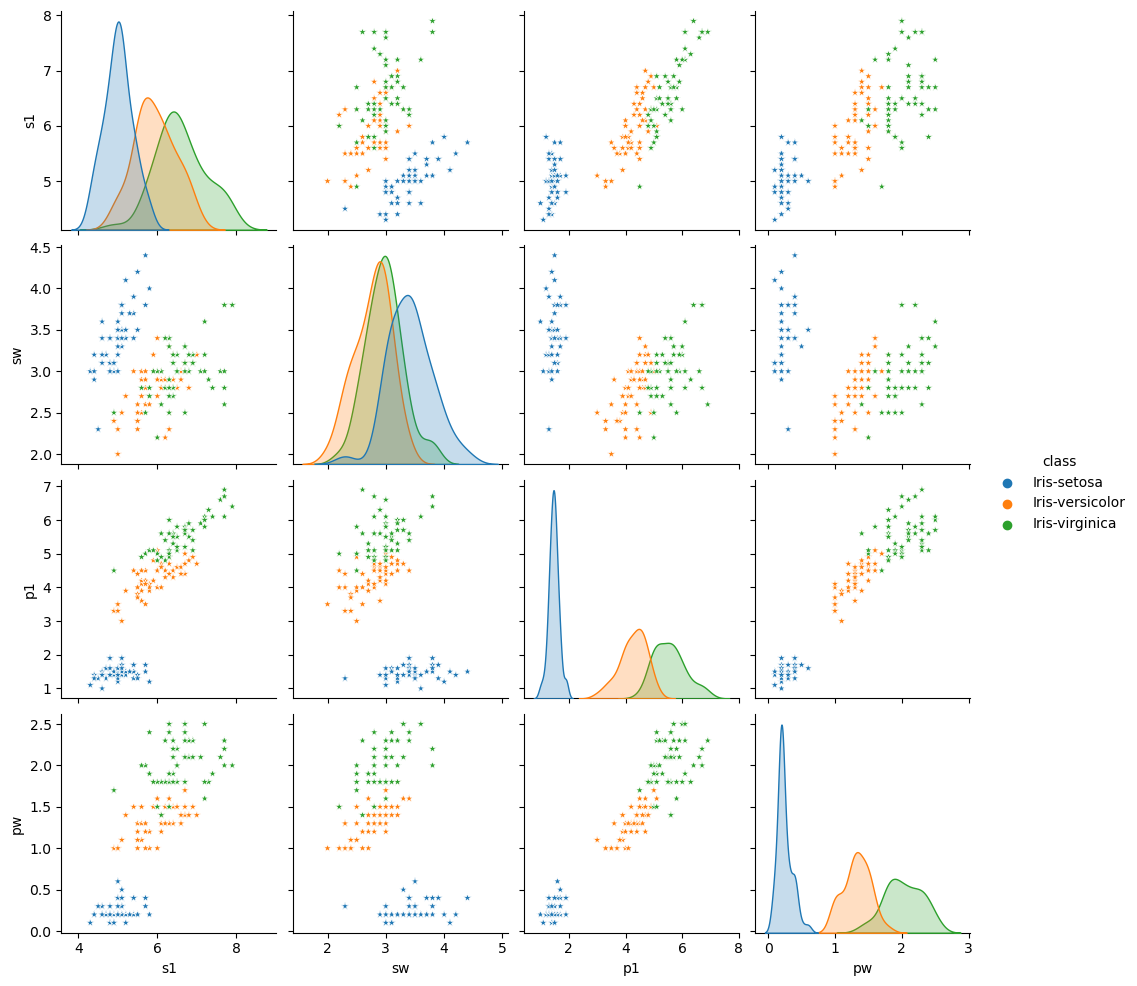

In [71]:
g = sns.pairplot(data, hue='class', markers='*')
plt.show()

# Training and Testing the data

In [42]:
X = data.drop(['class'], axis=1)
y = data['class']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


# KNN Algirithm

In [49]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

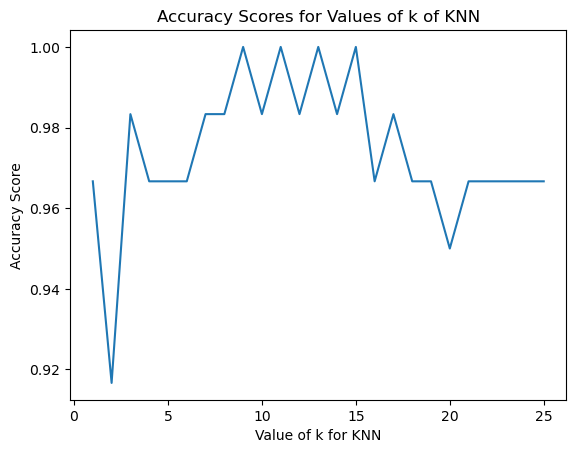

In [53]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of KNN')
plt.show()

In [54]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [58]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=12)

In [63]:
knn.predict([[1.0, 0.5, 0.2, 4.1]])

C:\Users\ICON\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)